In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#reading the dataset
df=pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.shape #to check number of rows and columns

(205, 7)

In [4]:
df.isna().sum() # to check for null values

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

#### 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

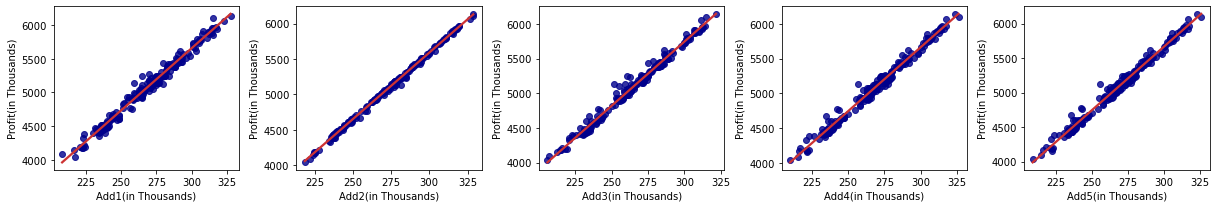

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(17,3))
lst=['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)']
c=0
for i in lst:
    sns.regplot(x=df[i], y=df['Profit(in Thousands)'], ci=None,scatter_kws={"color": "#00008B"}, line_kws={"color": "#CD3333"},ax=axes[c])
    c+=1
plt.tight_layout()

From the above plots we can see there is a strong positive linear relationship between all 5 advertisements and Profit. Among these Add2 is having the strongest relationship with profit as the data points are almost a straight line

<AxesSubplot:>

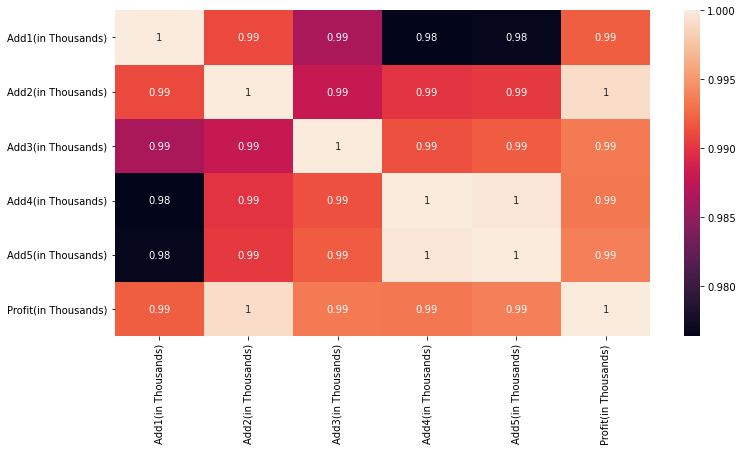

In [20]:
# Correlation using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(),annot=True)

From the above heatmap it is evident that there exists a very strong correlation among all parameters especially the correlation between Add2 and Profit

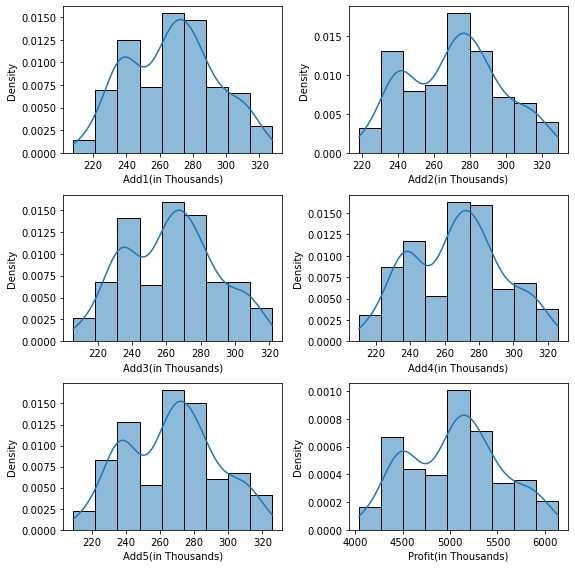

In [23]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(8,8))
sns.histplot(data=df['Add1(in Thousands)'],kde=True,stat='density',ax=axes[0,0])
sns.histplot(data=df['Add2(in Thousands)'],kde=True,stat='density',ax=axes[0,1])
sns.histplot(data=df['Add3(in Thousands)'],kde=True,stat='density',ax=axes[1,0])
sns.histplot(data=df['Add4(in Thousands)'],kde=True,stat='density',ax=axes[1,1])
sns.histplot(data=df['Add5(in Thousands)'],kde=True,stat='density',ax=axes[2,0])
sns.histplot(data=df['Profit(in Thousands)'],kde=True,stat='density',ax=axes[2,1])
plt.tight_layout()

The overall distribution of variables is almost similar and roughly normal

#### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [31]:
# setting features and target
X=df[['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)']] # features
y=df['Profit(in Thousands)'] #target
# splitting into train data and test data with 70% and 30% data respectively
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print("MSE is ",mean_squared_error(y_test,prediction))
print("R^2 is ",r2_score(y_test,prediction))

MSE is  1.4542368833593551e-24
R^2 is  1.0


A very low MSE and high R^2 value of 1 suggests the linear regression model is best fit

#### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [32]:
X_test=[{'Add1(in Thousands)':290,'Add2(in Thousands)':312,'Add3(in Thousands)':309,
'Add4(in Thousands)':298,'Add5(in Thousands)':320}]
X_test=pd.DataFrame(X_test)
X_test

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [36]:
prediction=model.predict(X_test)
print(r"Predicted Profit(in Thousands): ",prediction[0])

Predicted Profit(in Thousands):  5820.06


Based on the linear regression model built the predicted profit is 5820.06